## CO2 EMISSIONS IN THE PHILIPPINES AND POTENTIAL UNDERLYING CORRELATIONS

### Motivation

I picked the Philippines because I am half Filipino, and I thought it would be interesting to learn a little bit more about my mother's home country while while doing this assignment. It's also the only foreign country I've been to, so I wanted to see if I could draw any parallels between the statistics I find and any insights I had in real life.

The Philippines is a developing country and its CO2 emissions are indicative of this. The country of 115 million people emits 1.35 tonnes of CO2 per capita. In total, it emits 154.58 millions tonnes of CO2. Although there are periodic dips in emissions, the country has consistently increased its CO2 emissions since the 1950s. (ourworldindata.org)

### Main Questions

(1) How has the chosen COUNTRY’s CO2 emissions changed over time? And how
does the chosen COUNTRY compare to other countries? <br>
2) Are CO2 emissions, temperature, and natural disasters in the chosen COUNTRY
associated?

### Context

For this project, we are aiming to understand CO2 emissions in the Philippines. We will be comparing CO2 emissions from other countries, while attempting to find underyling connections between some indicators and emissions. For this project, we will be unraveling data concerning CO2 emissions, natural disasters, gdp and growth, energy use, and average temperature. We will be going into more detail about the data in a later section.

### Limitations

#### What can we say with this data?

We can draw some conclusions about the change in CO2 emissions in the Philippines overtime. We can also try to draw these conclusions with gdp per capita, energy usage, temperature, and disasters in mind. We can draw some correlation between events and CO2 emissions, but we cannot definiitely determine causation.

#### What does our data measure?

Our data measures the CO2 emissions in the Philippines. We are also tracking the GDP per capita, the number of storms that occur per year, the average temperature per year, and the average energy usage per year.

### Import

In [1]:
# pip install streamlit -i https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
CO2 = pd.read_csv("https://raw.githubusercontent.com/gwxnne/Aldrich_Streamlit_ENVECON105/main/co2_pcap_cons.csv")
disasters = pd.read_excel("https://raw.githubusercontent.com/gwxnne/Aldrich_Streamlit_ENVECON105/main/public_emdat_custom_request_2025-08-16_a5922965-bb80-478a-984f-461f64560ac9.xlsx")
gdp = pd.read_csv("https://raw.githubusercontent.com/gwxnne/Aldrich_Streamlit_ENVECON105/main/API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_37698.csv", skiprows=4)
energy_use = pd.read_csv("https://raw.githubusercontent.com/gwxnne/Aldrich_Streamlit_ENVECON105/main/API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_22839.csv", skiprows=4)
temp = pd.read_excel("https://raw.githubusercontent.com/gwxnne/Aldrich_Streamlit_ENVECON105/main/cmip6-x0.25_timeseries_tas_timeseries_annual_1950-2014,2015-2100_median,p10,p90_historical,ssp119,ssp126,ssp245,ssp370,ssp585_ensemble_all_mean.xlsx")



### Data Wrangling

First, let's take a look at the star of the show, CO2 emissions:

In [4]:
CO2.head(n=5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.28,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284
1,Angola,0.009,0.009,0.009,0.009,0.009,0.009,0.010,0.010,0.010,...,1.28,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230
2,Albania,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,2.27,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100
3,Andorra,0.333,0.335,0.337,0.340,0.342,0.345,0.347,0.350,0.352,...,5.9,5.830,5.970,6.070,6.270,6.120,6.060,5.630,5.970,5.910
4,UAE,0.063,0.063,0.064,0.064,0.064,0.064,0.065,0.065,0.065,...,27,26.800,27.000,26.700,23.900,23.500,21.200,19.700,20.700,21.100


Something looks a little off with the data, 21.100 Tonnes of CO2 isn't a realistic output for a country, especiallt the UAE. The current data we're working with is emissions per capita. We can multiply the per capita outputs times population to get a country's total output 

In [5]:
def parse_number(x):
    if pd.isna(x):  
        return None
    x = str(x).strip()
    if x.endswith("M"):
        return float(x[:-1]) * 1_000_000
    elif x.endswith("k"):
        return float(x[:-1]) * 1_000
    elif x.endswith("B"):
        return float(x[:-1]) * 1_000_000_000
    else:
        return float(x)

As we can see, our current data set deals with data from all countries around the world. The format for this data isn't ideal for what we want to do. We can use the pandas function melt to turn each row into an individual entry for a country per year. We'll also perform some basic data cleaning.

In [6]:
CO2melt = pd.melt(
    CO2,
    id_vars=["country"],
    var_name="Year",         
    value_name="Emissions"   
)
CO2melt = CO2melt.rename(columns = {"country":"Country"})
CO2melt["Year"] = pd.to_numeric(CO2melt["Year"])
CO2melt["Label"] = "CO2 Emissions (Metric Tons)"
CO2melt.head()

,Country,Year,Emissions,Label
0,Afghanistan,1800,0.001,CO2 Emissions (Metric Tons)
1,Angola,1800,0.009,CO2 Emissions (Metric Tons)
2,Albania,1800,0.001,CO2 Emissions (Metric Tons)
3,Andorra,1800,0.333,CO2 Emissions (Metric Tons)
4,UAE,1800,0.063,CO2 Emissions (Metric Tons)


There are some small issues that occured when importing the csv. The negative in front of this value is under a different code, so pandas is unable to convert the string into an integer. In the following cell, I will adjust some of these discrepencies

In [7]:
problem_indices = [39517,39711,39905,40099,41069,41263,41457]
for idx in problem_indices:
    CO2melt["Emissions"][idx] = '-' + CO2melt["Emissions"][idx][1:6]  
# CO2melt["Emissions"][39517] = '-' + CO2melt["Emissions"][39517][1:6]
# CO2melt["Emissions"][39711] = '-' + CO2melt["Emissions"][39711][1:6]
# CO2melt["Emissions"][39905] = '-' + CO2melt["Emissions"][39905][1:6]
# CO2melt["Emissions"][40099] = '-' + CO2melt["Emissions"][40099][1:6]
# CO2melt["Emissions"][41069] = '-' + CO2melt["Emissions"][41069][1:6]
# CO2melt["Emissions"][41263] = '-' + CO2melt["Emissions"][41263][1:6]
# CO2melt["Emissions"][41457] = '-' + CO2melt["Emissions"][41457][1:6]

CO2melt["Emissions"] = pd.to_numeric(CO2melt["Emissions"])
CO2melt.head()

/var/folders/v2/8qkkty650w9_hn0cfrzxsncr0000gn/T/ipykernel_68513/1502734872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2melt["Emissions"][idx] = '-' + CO2melt["Emissions"][idx][1:6]
/var/folders/v2/8qkkty650w9_hn0cfrzxsncr0000gn/T/ipykernel_68513/1502734872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2melt["Emissions"][idx] = '-' + CO2melt["Emissions"][idx][1:6]
/var/folders/v2/8qkkty650w9_hn0cfrzxsncr0000gn/T/ipykernel_68513/1502734872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,Country,Year,Emissions,Label
0,Afghanistan,1800,0.001,CO2 Emissions (Metric Tons)
1,Angola,1800,0.009,CO2 Emissions (Metric Tons)
2,Albania,1800,0.001,CO2 Emissions (Metric Tons)
3,Andorra,1800,0.333,CO2 Emissions (Metric Tons)
4,UAE,1800,0.063,CO2 Emissions (Metric Tons)


With CO2 emissions down, let's take a look at gdp data. The GDP data is similar to the CO2 emissions data in the sense that columns are individual years and rows are individual countries. For the purposes of this project, it'd be easiest to melt the data

In [8]:
gdp.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.951538,7.040657,2.234429,-2.496550,-25.793229,25.154964,8.912308,4.216132,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-2.132940,5.008777,2.794386,1.829575,2.245805,...,-0.467421,0.018464,-0.104064,-0.543715,-5.447021,1.829597,0.905330,-0.645084,0.256613,NaN
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.300121,-0.195570,-1.713743,0.856295,-5.382515,-22.584482,-7.576669,0.106093,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-0.251142,1.538396,4.741446,3.087620,1.823720,...,-2.448451,-0.355460,0.330192,0.792526,-3.321745,1.599746,1.578046,0.920848,1.707193,NaN
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.002649,-3.620758,-4.665970,-4.010017,-8.672076,-1.969591,-0.143628,-1.988293,1.292931,NaN


In [10]:
gdp_cleaned = gdp.drop(columns = ["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 69"])
gdp_melt = pd.melt(
    gdp_cleaned,
    id_vars=["Country Name"],
    var_name="Year",         
    value_name="gdp_growth"   
)
gdp_melt = gdp_melt.rename(columns = {"Country Name": "Country"})
gdp_melt["Year"] = pd.to_numeric(gdp_melt["Year"])
gdp_melt["Label"] = "GDP Growth/Capita (%)"
gdp_melt.sample(n=3)

,Country,Year,gdp_growth,Label
9367,Dominica,1995,3.042728,GDP Growth/Capita (%)
6673,"Bahamas, The",1985,3.052309,GDP Growth/Capita (%)
5358,Channel Islands,1980,NaN,GDP Growth/Capita (%)


Our CO2 and GDP growth tables look great, let's move forward with the energy use table. We're going to use a similar process with this table as we did with the others. Let's first observe it and melt it

In [11]:
energy_use_cleaned = energy_use.drop(columns = ["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 69"])
energy_use_melt = pd.melt(
    energy_use_cleaned,
    id_vars = ["Country Name"],
    var_name = "Year",
    value_name = "energy_use").rename(columns = {"Country Name":"Country"})
energy_use_melt["Year"] = pd.to_numeric(energy_use_melt["Year"])
energy_use_melt["Label"] = "Energy Use (kg, oil-eq./capita)"
energy_use_melt.sample(n=3)

,Country,Year,energy_use,Label
10211,IDA & IBRD total,1998,851.178019,"Energy Use (kg, oil-eq./capita)"
6249,Liberia,1983,NaN,"Energy Use (kg, oil-eq./capita)"
11615,Norway,2003,5934.590798,"Energy Use (kg, oil-eq./capita)"


Let's take a look at disasters

In [12]:
np.unique(disasters["Disaster Type"])

array(['Drought', 'Earthquake', 'Epidemic', 'Extreme temperature',
       'Flood', 'Infestation', 'Mass movement (dry)',
       'Mass movement (wet)', 'Storm', 'Volcanic activity', 'Wildfire'],
      dtype=object)

As we can see here, there is a wide variety of disasters we could work with. I think a particularly interesting disaster to explore would be storms, given the Philippines' status as a tropical and typhoon prone country.

In [13]:
disasters_storms = disasters[disasters["Disaster Type"] == "Storm"]
disasters_storms.head(n=3)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1905-0004-PHL,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,2.864401,NaN,2003-07-01,2023-09-25
2,1912-0010-PHL,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,10000.0,325036.0,3.076579,NaN,2003-07-01,2023-09-25
5,1931-0008-PHL,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,4.844817,NaN,2003-07-01,2023-09-25


In [14]:
storm_count = disasters_storms[["Start Year", "DisNo."]]
storm_count = storm_count.groupby("Start Year").count().reset_index()
storm_count = storm_count.rename(columns = {"Start Year": "Year", "DisNo.":"Count"})
storm_count["Label"] = "Number of Storms"
storm_count.sample(n=3)

,Year,Count,Label
2,1931,1,Number of Storms
65,2009,14,Number of Storms
67,2011,12,Number of Storms


Let's now take a look at our final dataframe temperature.

Only one row, makes this a bit easier to work with. Our first step will be to clean up the years. Lets just take the first four values in the dates to extract the year. From there, we can melt!

In [16]:
temp_clean = temp.drop(columns = ["code"])
temp_melt = pd.melt(
    temp_clean,
    id_vars = ["name"],
    var_name = "Year",
    value_name = "Mean Temperature"
)
temp_melt["Year"] = temp_melt["Year"].str[0:4]
temp_melt["Year"] = pd.to_numeric(temp_melt["Year"])
temp_melt["Label"] = "Average Temperature in Celsius"
temp_melt = temp_melt.rename(columns = {"name":"Country"})
temp_melt.sample(n=3)

,Country,Year,Mean Temperature,Label
42,Philippines,1992,25.57,Average Temperature in Celsius
35,Philippines,1985,25.71,Average Temperature in Celsius
55,Philippines,2005,26.14,Average Temperature in Celsius


### Extracting Data from the Philippines and Joining

In [17]:
PH_CO2 = CO2melt[CO2melt["Country"] == "Philippines"]
PH_gdp = gdp_melt[gdp_melt["Country"] == "Philippines"]
PH_energy_use = energy_use_melt[energy_use_melt["Country"] == "Philippines"]
#both the disaster and temperature dataset already exclusively contain data from the Pbilippines

In [18]:
data_wide = (
    CO2melt
    .merge(gdp_melt, on=["Country", "Year", "Label"], how="outer")
    .merge(energy_use_melt, on=["Country", "Year", "Label"], how="outer")
)
data_wide.sample(n=3)

,Country,Year,Emissions,Label,gdp_growth,energy_use
62107,Sint Maarten (Dutch part),1965,NaN,"Energy Use (kg, oil-eq./capita)",NaN,NaN
71910,Peru,2002,NaN,"Energy Use (kg, oil-eq./capita)",NaN,478.085368
70669,Argentina,1998,NaN,"Energy Use (kg, oil-eq./capita)",NaN,1648.112636


Let's melt this combined dataset

In [19]:
data_long = data_wide.melt(
    id_vars=["Country", "Year", "Label"], 
    var_name="Indicator",               
    value_name="Value"                      
)
data_long.sample(n=3)

,Country,Year,Label,Indicator,Value
200833,Belarus,1967,GDP Growth/Capita (%),energy_use,NaN
30001,Niger,1954,CO2 Emissions (Metric Tons),Emissions,0.007000
131513,Canada,1999,GDP Growth/Capita (%),gdp_growth,4.289837


We can seperate this data into the Philippines and rest of the World. Let's also remove na values while we're at it

In [20]:
data_long["Region"] = np.where(
    data_long["Country"] == "Philippines",
    "Philippines",
    "Rest of the World"
)
data_long = (
    data_long
    .dropna()
    .sort_values(by="Country")
)

### DATA VISUALIZATION

There are some small issues that occured when importing the csv. The negative in front of this value is under a different code, so pandas is unable to convert the string into an integer. In the following cell, I will adjust some of these discrepencies

Let's take a look at global emissions per capita. The following table (data_long_gf) will sum up the emissions from all countries per year. We can then observe these values on a graph to see how emissions have changed over time

In [21]:
data_long_gf = data_long[data_long["Indicator"]=="Emissions"].groupby("Year")["Value"].sum().reset_index()
data_long_gf.head(n=3)

,Year,Value
0,1800,12.532
1,1801,12.573
2,1802,12.610


Text(0.5, 1.0, 'World $CO{2}$ Emissions per capita per Year (1800-2022)')

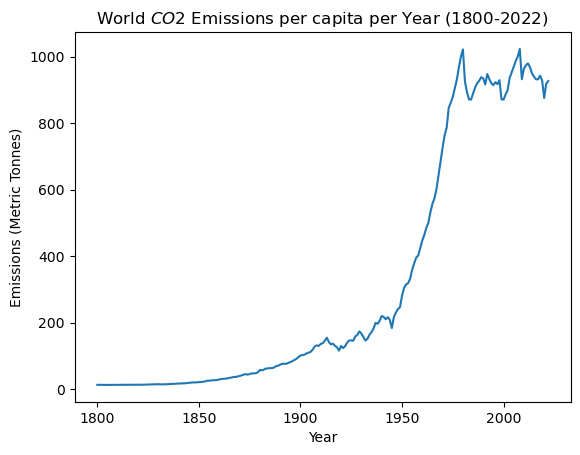

In [22]:
plt.plot(data_long_gf["Year"], data_long_gf["Value"], linewidth=1.5)
plt.xlabel("Year")
plt.ylabel("Emissions (Metric Tonnes)")
plt.title(r"World $CO{2}$ Emissions per capita per Year (1800-2022)")

Let's now compare the emissions of all countries, with a special emphasis on the Philippines

2025-08-17 19:22:02.254 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:22:02.520 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:22:02.688 
  command:

    streamlit run /Users/aldrichgwynne/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-08-17 19:22:02.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:22:02.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

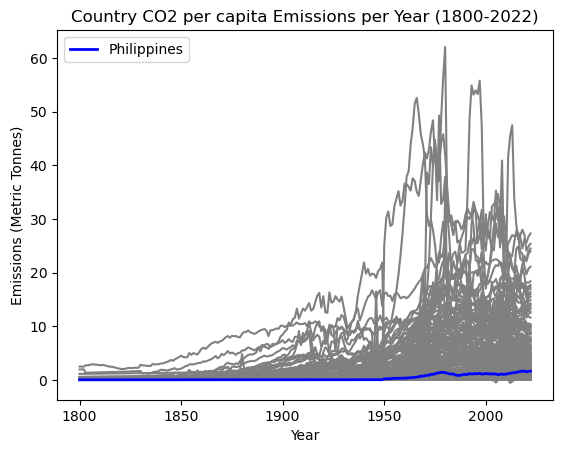

In [23]:
data_long_emissions = data_long[data_long["Indicator"]=="Emissions"]

data_long_f_cg = data_long[data_long["Indicator"]=="Emissions"].groupby(["Year","Country"])["Value"].sum().reset_index()
fig, ax = plt.subplots()
for country in data_long_emissions["Country"].unique():
    xf = data_long_f_cg.loc[data_long_f_cg["Country"] == country]
    ax.plot(xf["Year"], xf["Value"], color="gray")
    
ph_data = data_long_f_cg[data_long_f_cg["Country"] == "Philippines"]
ax.plot(ph_data["Year"], ph_data["Value"], color="blue", label="Philippines", linewidth=2)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (Metric Tonnes)")
ax.set_title("Country CO2 per capita Emissions per Year (1800-2022)")
ax.legend()
st.pyplot(fig)

As we can see the Philippines makes up a minor portion of global CO2 emissions. Just to compare, let's take a look at the top 10 countries

In [24]:
top_10_count = data_long[(data_long["Indicator"] == "Emissions") & (data_long["Year"] == 2014)]
top_10_count = top_10_count.sort_values("Value", ascending = False)[:10]
top_10_count

,Country,Year,Label,Indicator,Value,Region
41668,Singapore,2014,CO2 Emissions (Metric Tons),Emissions,33.9,Rest of the World
41520,UAE,2014,CO2 Emissions (Metric Tons),Emissions,26.8,Rest of the World
41661,Qatar,2014,CO2 Emissions (Metric Tons),Emissions,25.6,Rest of the World
41541,Brunei,2014,CO2 Emissions (Metric Tons),Emissions,20.8,Rest of the World
41621,Luxembourg,2014,CO2 Emissions (Metric Tons),Emissions,20.3,Rest of the World
41611,Kuwait,2014,CO2 Emissions (Metric Tons),Emissions,20.0,Rest of the World
41528,Belgium,2014,CO2 Emissions (Metric Tons),Emissions,18.9,Rest of the World
41665,Saudi Arabia,2014,CO2 Emissions (Metric Tons),Emissions,18.9,Rest of the World
41699,USA,2014,CO2 Emissions (Metric Tons),Emissions,18.0,Rest of the World
41546,Switzerland,2014,CO2 Emissions (Metric Tons),Emissions,17.0,Rest of the World


2025-08-17 19:28:24.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:28:25.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:28:25.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:28:25.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


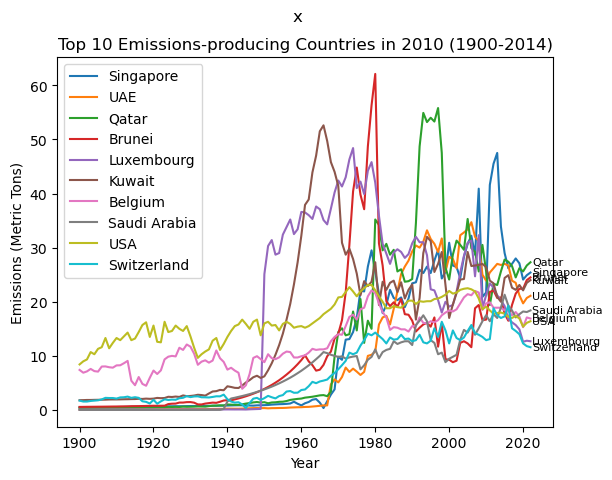

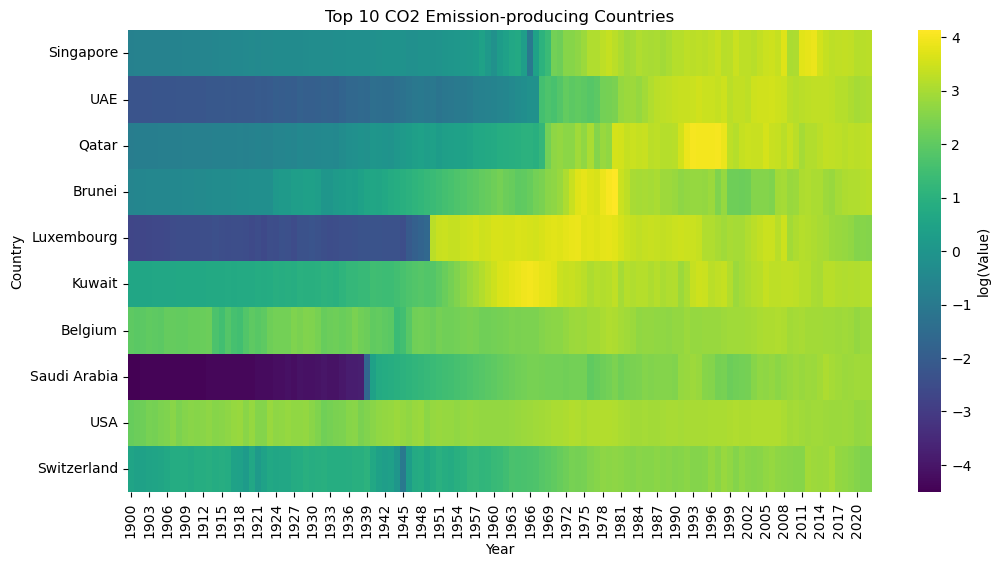

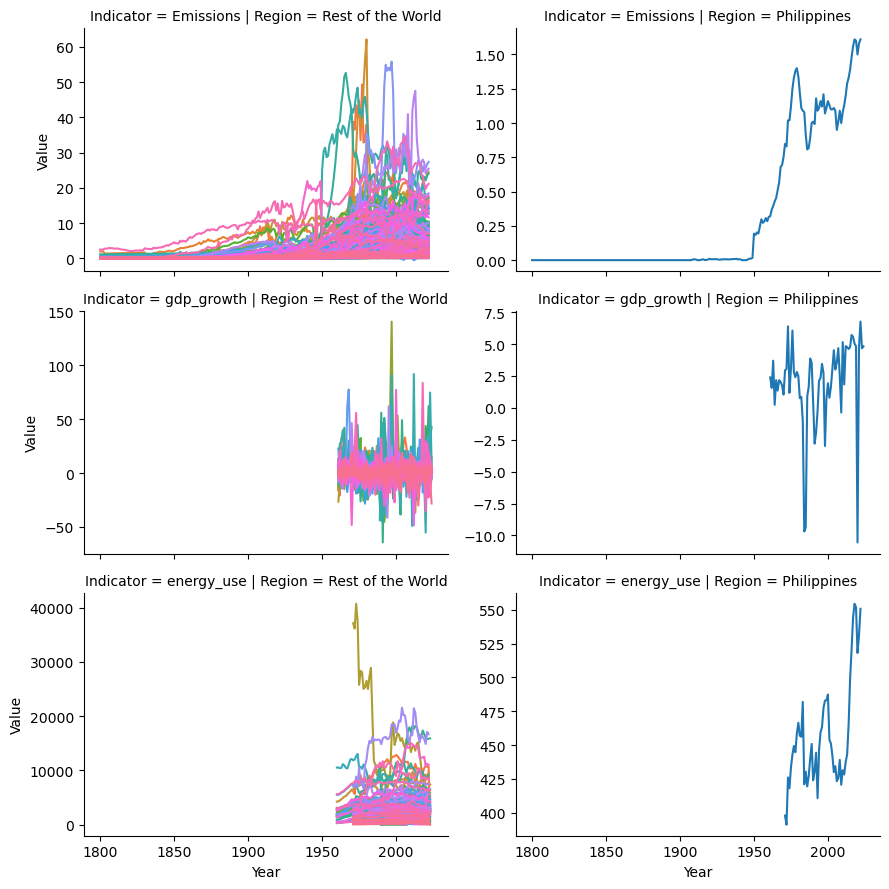

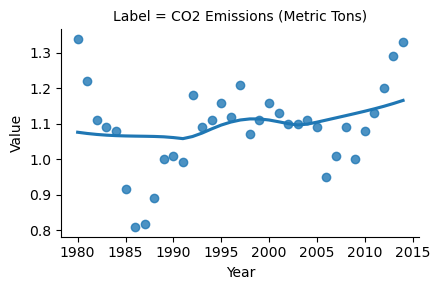

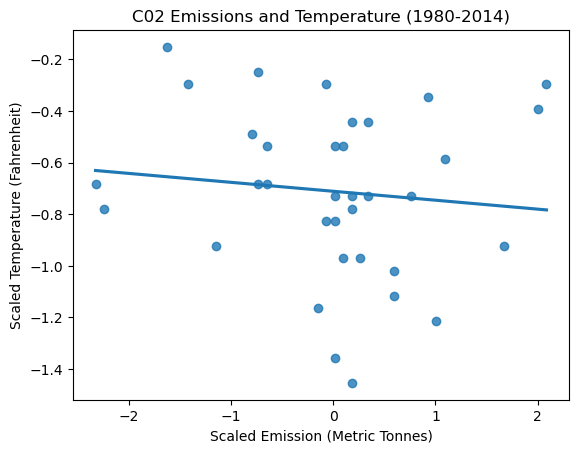

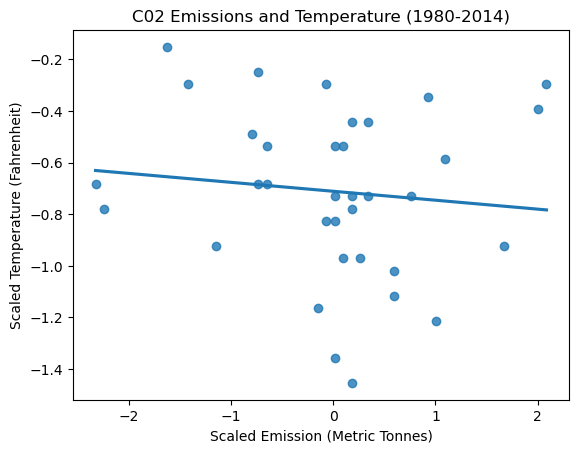

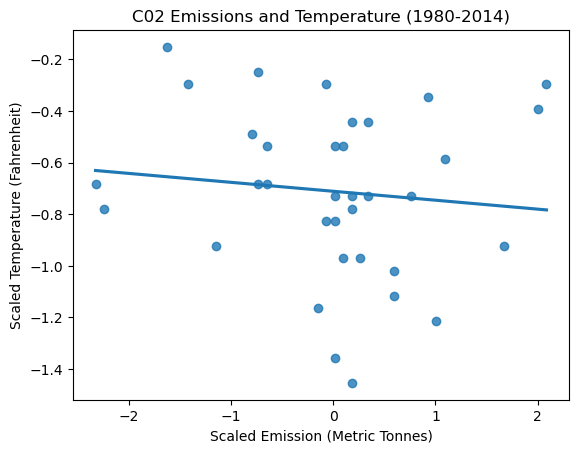

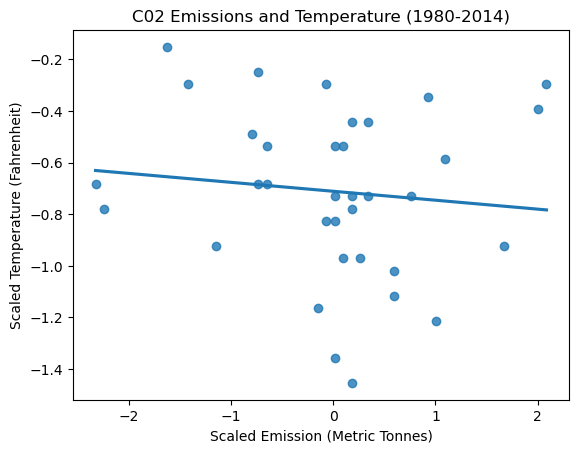

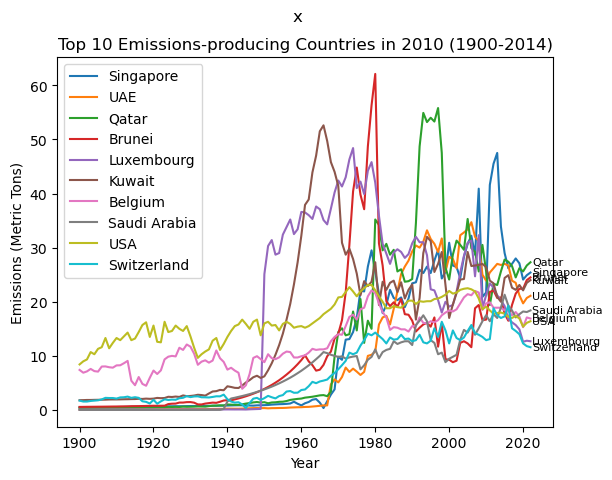

In [37]:
fig, ax = plt.subplots()
for country in top_10_count["Country"]:
    xf = data_long_f_cg.loc[data_long_f_cg["Country"] == country]
    xf = xf.loc[xf["Year"]>=1900]
    ax.plot(xf["Year"], xf["Value"], label = country)
    ax.text(
        xf["Year"].max() + 0.5,
        xf.loc[xf["Year"].idxmax(), "Value"],
        country,
        fontsize = 8,
        va="center"
    )
    
ax.legend()
ax.set_title("Top 10 Emissions-producing Countries in 2010 (1900-2014)")
plt.suptitle("x")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (Metric Tons)")
st.pyplot(fig)
plt.show()


Let's graph these country's emissions per capita as well. 

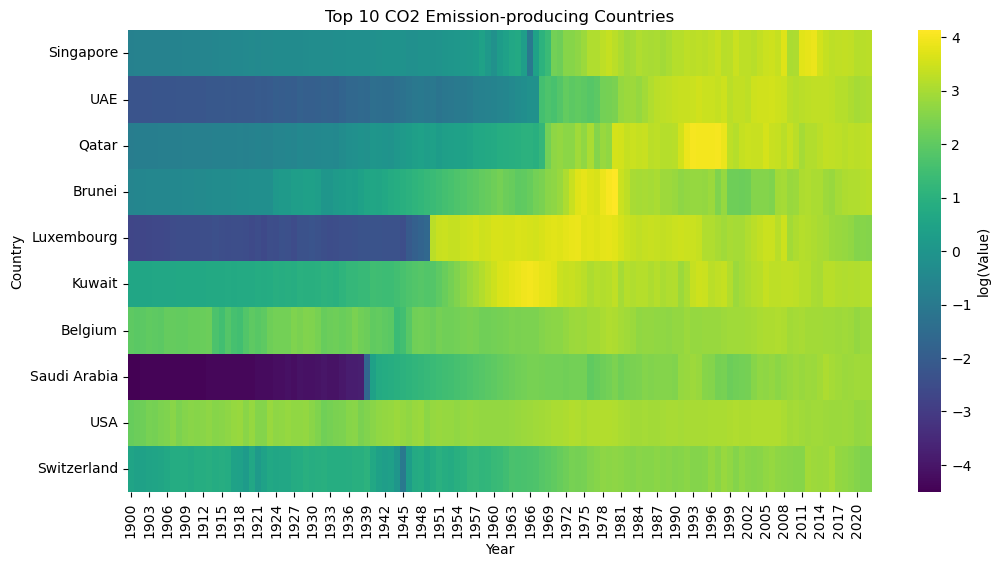

In [38]:
top_10_countries = top_10_count["Country"]
top10 = data_long[data_long["Country"].isin(top_10_countries)]
top10 = top10[top10["Indicator"] == "Emissions"]
top10 = top10[top10["Year"] >= 1900]

plt.figure(figsize=(12, 6))
heatmap_data = top10.pivot(index="Country", columns="Year", values="Value")
order = heatmap_data.sort_values(2014, ascending=False).index
heatmap_data = heatmap_data.loc[order]

sns.heatmap(
    np.log(heatmap_data),
    cmap="viridis",
    cbar_kws={"label": "log(Value)"}
)

plt.title("Top 10 CO2 Emission-producing Countries")
plt.show()

/Users/aldrichgwynne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


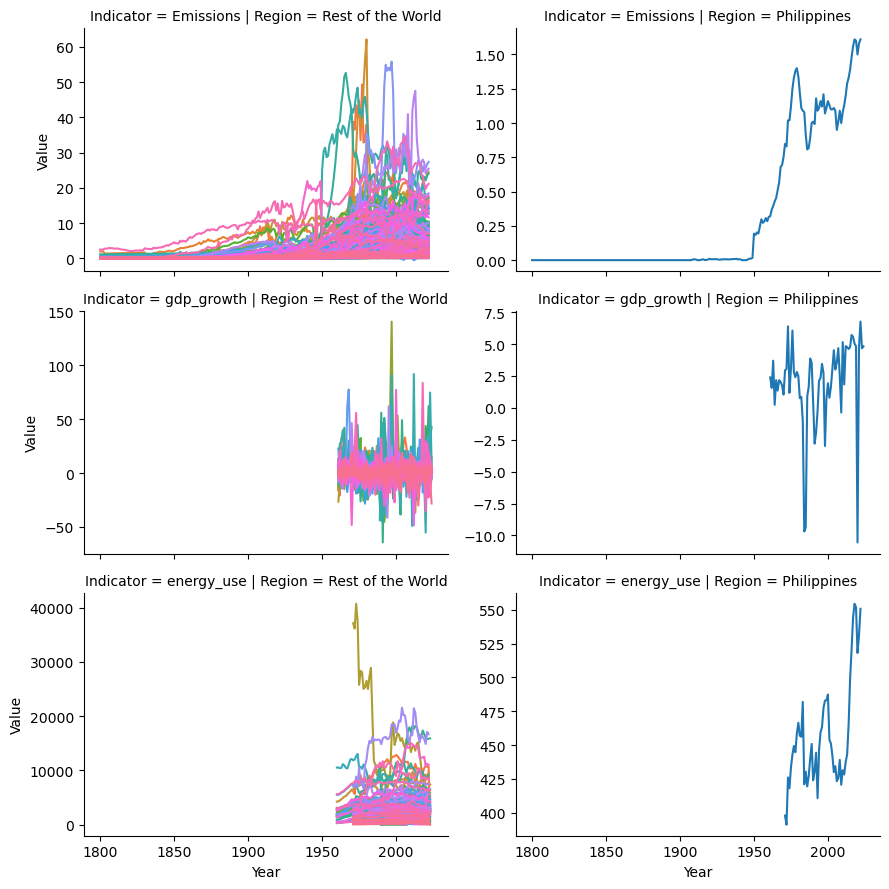

In [39]:
facetdata = data_long[~data_long["Indicator"].isin(["Disasters", "Temperature"])]
grid = sns.FacetGrid(facetdata, row ="Indicator", col="Region", sharey = False, aspect=1.5)
grid.map_dataframe(sns.lineplot, x="Year", y="Value", hue="Country", legend=False)
plt.show()

/Users/aldrichgwynne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


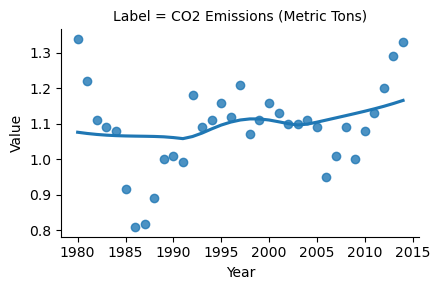

In [40]:
CO2_temp_PH_facet = data_long[data_long["Country"] == "Philippines"]

CO2_temp_PH_facet = CO2_temp_PH_facet[CO2_temp_PH_facet["Year"] >= 1980]
CO2_temp_PH_facet = CO2_temp_PH_facet[CO2_temp_PH_facet["Year"] <= 2014]
CO2_temp_PH_facet = CO2_temp_PH_facet[CO2_temp_PH_facet["Indicator"].isin(["Emissions", "Temperature"])]

grid = sns.FacetGrid(CO2_temp_PH_facet,row="Label", sharey=False, aspect=1.5)
grid.map_dataframe(sns.regplot, x="Year", y="Value", lowess = True, scatter=True)

plt.show()

### DATA ANALYSIS

We can expect there to be some parallels between temperature and emissions, let's explore that possibility here! Let's first find the average temperature and co2 emissions in addition to their standard deviations

In [29]:
wide_PH = data_long[data_long["Country"] == "Philippines"]
wide_PH = wide_PH[wide_PH["Year"] >= 1980]
wide_PH = wide_PH[wide_PH["Year"] <= 2014]
wide_PH = wide_PH.drop(columns=["Label"]).pivot(index=["Year","Country"],columns="Indicator",values="Value").reset_index()

In [30]:
CO2_mean = np.mean(wide_PH["Emissions"])
CO2_std = np.std(wide_PH["Emissions"])
temp_mean = np.mean(temp_melt["Mean Temperature"])
temp_std = np.std(temp_melt["Mean Temperature"])
print("The mean for emissions in the Philippines is " + str(CO2_mean))
print("The std for emissions in the Philippines is " + str(CO2_std))
print("The mean for temperature in the Philippines is " + str(temp_mean))
print("The std for temperature in the Philippines is " + str(temp_std))

The mean for emissions in the Philippines is 1.088514285714286
The std for emissions in the Philippines is 0.12053129325225556
The mean for temperature in the Philippines is 25.811384615384615
The std for temperature in the Philippines is 0.207281873659828


Let's now take a look at how they correlate with one another. The result here is interestingly enough different than the United States' correlation in the way that it is negative. As the average temperature increases, the emissions decrease.

In [31]:
CO2_temp_corr = wide_PH["Emissions"].corr(temp_melt["Mean Temperature"])
CO2_temp_corr

-0.10894672474217744

In [32]:
def scale(data):
    return (data-np.mean(data))/np.std(data)

2025-08-17 19:28:51.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:28:52.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:28:52.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 19:28:52.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


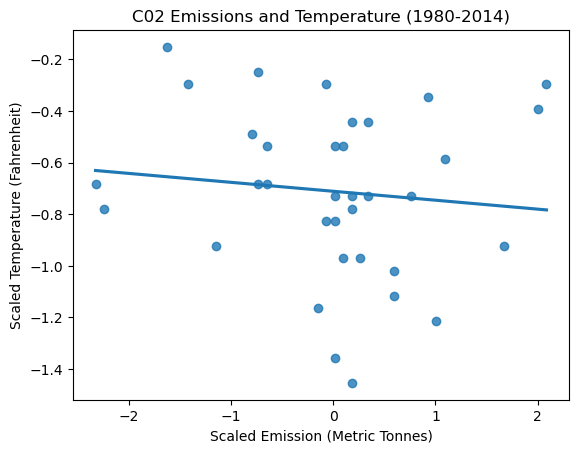

In [41]:
wide_PH["Emissions_scaled"] = scale(wide_PH["Emissions"])
wide_PH["Temp_scaled"] = scale(temp_melt["Mean Temperature"])
fig, ax = plt.subplots()
sns.regplot(data = wide_PH, x="Emissions_scaled", y="Temp_scaled", ci=False, ax=ax)
ax.set_title("C02 Emissions and Temperature (1980-2014)")
ax.set_xlabel("Scaled Emission (Metric Tonnes)")
ax.set_ylabel("Scaled Temperature (Fahrenheit)")
st.pyplot(fig)
plt.show()

### SUMMARY

In this case study, we took a look at a variety of measures to understand the impact of CO2 emissions in the Philippines and the potential reasons for why they are the way they are now. CO2 emissions per capita have invariably increased over time, but so does every other metric (except temperature). We explored the possibility for some correlation between disasters, temperature, energy use, and GDP to emissions.

Although it is now common scientific knowledge that the proliferation of greenhouse gasses has effects such as increased global temperatures. However, these events are no exclusive to the Philippines and it would be disingenuous to assert that production and movement in the Philippines is the sole factor that contributes to changes in their emissions. Climate change is a global movement and the actions of one player has effects on everyone. There are also many contextual details that make patterns difficult to draw. Earlier in this project we saw that temperature and emissions had a NEGATIVE correlation, much to the dissent of original proposed thought. When we consider the tropical and year-round hot weather in the Philippines though, it gives some reason that the negative correlation came about (if at all given the random nature of the plot). There is still a lot more data to unpack and unravel to make definitive assertions on the factors that influence emissions in the Philippines.